In [1]:
import genophenocorr
from genophenocorr.preprocessing import load_phenopacket_folder
from genophenocorr.preprocessing import configure_caching_cohort_creator
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

/Users/robin/PycharmProjects/genophenocorr/gpc_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


In [2]:
TBX5_MANE_transcript = 'NM_181486.4'
TBX5_protein_id = "NP_852259.1"
cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)
phenopacket_input_folder = "../../GIT/phenopacket-store/notebooks/TBX5/phenopackets/"
cohort = load_phenopacket_folder(pp_directory=phenopacket_input_folder, cohort_creator=cohort_creator)

Patients Created: 100%|██████████| 142/142 [00:03<00:00, 38.27it/s]
Validated under none policy
No errors or warnings were found


In [3]:
from IPython.display import display, HTML
from genophenocorr.view import CohortViewable

cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=TBX5_MANE_transcript)

display(HTML(html))

HPO Term,ID,Annotation Count
Atrial septal defect,HP:0001631,49
Hypoplasia of the radius,HP:0002984,37
Ventricular septal defect,HP:0001629,36
Triphalangeal thumb,HP:0001199,33
Short thumb,HP:0009778,31
Abnormal carpal morphology,HP:0001191,29
Absent thumb,HP:0009777,26
Secundum atrial septal defect,HP:0001684,21
Cardiac conduction abnormality,HP:0031546,14
Muscular ventricular septal defect,HP:0011623,13


In [4]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable

pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(TBX5_protein_id)
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(TBX5_MANE_transcript)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [5]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,1 - 46,13
Disordered,region,250 - 356,14


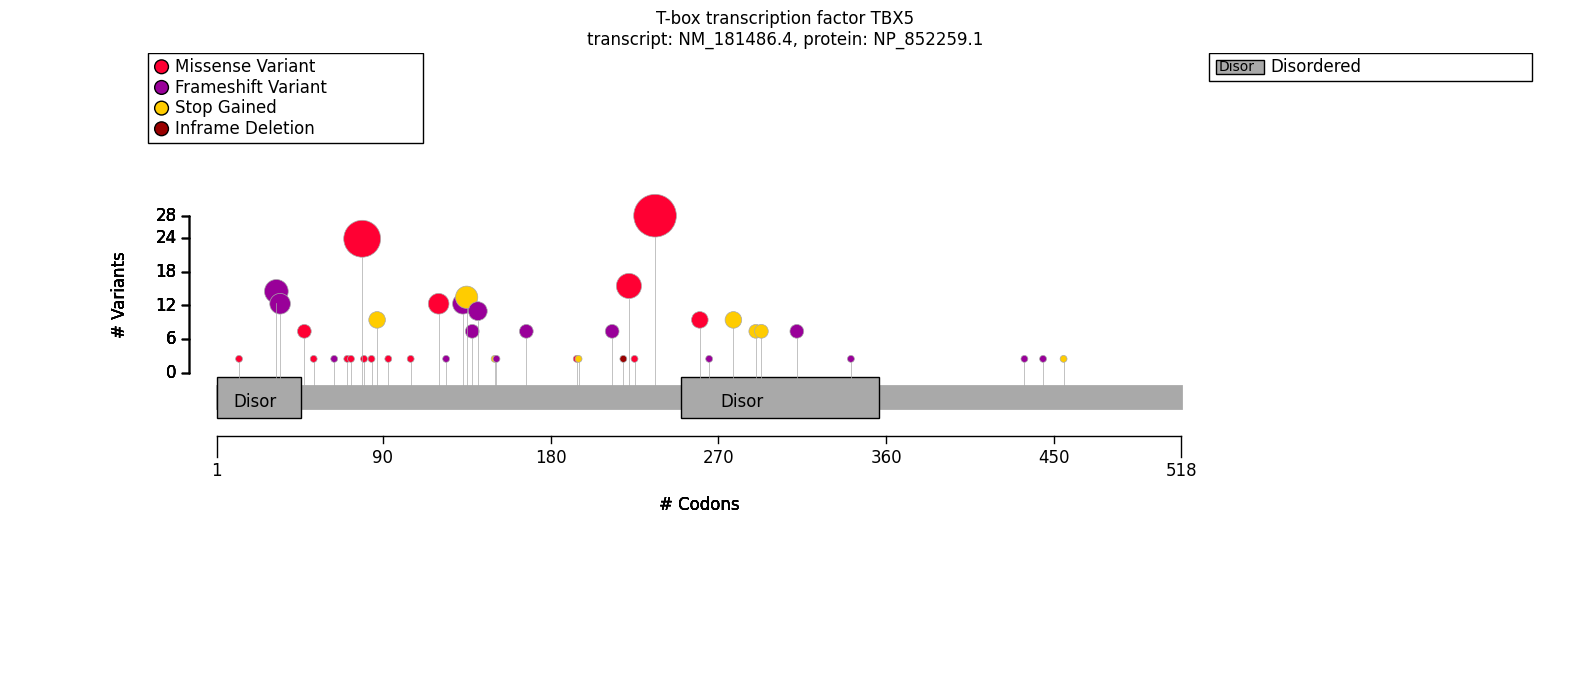

In [6]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis);

In [7]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.model.genome import Region

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False

analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [8]:
from genophenocorr.model import VariantEffect

frameshift = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=TBX5_MANE_transcript)
frameshift.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_181486.4                  Yes             No          \
                                               Count Percent  Count Percent   
Atrial septal defect [HP:0001631]              36/60     60%  38/38    100%   
Ventricular septal defect [HP:0001629]         27/51     53%  28/28    100%   
Triphalangeal thumb [HP:0001199]               11/63     17%  22/58     38%   
Absent thumb [HP:0009777]                       8/63     13%  18/57     32%   
Cardiac conduction abnormality [HP:0031546]    14/36     39%    3/3    100%   
...                                              ...     ...    ...     ...   
Abnormal 3rd finger morphology [HP:0004150]      1/1    100%    0/0      0%   
Abnormal skeletal morphology [HP:0011842]      65/65    100%  61/61    100%   
Abnormal long bone morphology [HP:0011314]     37/37    100%  17/17    100%   
Missing ribs [HP:0000921]                        1/1    100%    1/1    100%   
Abnormal mitral valve morphology [HP:0001633]    0/0      0%    2/2    100%   

MISSENSE_VARIANT on NM_181486.4                                            
                                                p value Corrected p value  
Atrial septal defect [HP:0001631]              0.000001          0.000375  
Ventricular septal defect [HP:0001629]         0.000002          0.000699  
Triphalangeal thumb [HP:0001199]               0.014404          1.000000  
Absent thumb [HP:0009777]                      0.014965          1.000000  
Cardiac conduction abnormality [HP:0031546]    0.074406          1.000000  
...                                                 ...               ...  
Abnormal 3rd finger morphology [HP:0004150]    1.000000          1.000000  
Abnormal skeletal morphology [HP:0011842]      1.000000          1.000000  
Abnormal long bone morphology [HP:0011314]     1.000000          1.000000  
Missing ribs [HP:0000921]                      1.000000          1.000000  
Abnormal mitral valve morphology [HP:0001633]  1.000000          1.000000  

[322 rows x 6 columns]

In [9]:
from genophenocorr.model import FeatureType

feature = analysis.compare_by_variant_keys(variant_key1="12_114385563_114385563_G_A",variant_key2="12_114398675_114398675_G_T")
feature.summarize(hpo, PatientCategories.YES)

>=1 allele of either variant 12_114385563_114385563_G_A or variant 12_114398675_114398675_G_T First  \
                                                                                              Count   
Absent thumb [HP:0009777]                                                                       0/8   
Hypoplasia of the radius [HP:0002984]                                                           4/7   
Triphalangeal thumb [HP:0001199]                                                                4/8   
Short thumb [HP:0009778]                                                                        2/8   
Ventricular septal defect [HP:0001629]                                                          6/6   
...                                                                                             ...   
Abnormal skeletal morphology [HP:0011842]                                                       6/6   
Abnormal long bone morphology [HP:0011314]                                                      4/4   
Atrial septal defect [HP:0001631]                                                               4/4   
Missing ribs [HP:0000921]                                                                       0/0   
Abnormal mitral valve morphology [HP:0001633]                                                   0/0   

>=1 allele of either variant 12_114385563_114385563_G_A or variant 12_114398675_114398675_G_T          \
                                                                                              Percent   
Absent thumb [HP:0009777]                                                                          0%   
Hypoplasia of the radius [HP:0002984]                                                             57%   
Triphalangeal thumb [HP:0001199]                                                                  50%   
Short thumb [HP:0009778]                                                                          25%   
Ventricular septal defect [HP:0001629]                                                           100%   
...                                                                                               ...   
Abnormal skeletal morphology [HP:0011842]                                                        100%   
Abnormal long bone morphology [HP:0011314]                                                       100%   
Atrial septal defect [HP:0001631]                                                                100%   
Missing ribs [HP:0000921]                                                                          0%   
Abnormal mitral valve morphology [HP:0001633]                                                      0%   

>=1 allele of either variant 12_114385563_114385563_G_A or variant 12_114398675_114398675_G_T Second  \
                                                                                               Count   
Absent thumb [HP:0009777]                                                                        3/6   
Hypoplasia of the radius [HP:0002984]                                                            1/6   
Triphalangeal thumb [HP:0001199]                                                                 1/6   
Short thumb [HP:0009778]                                                                         3/6   
Ventricular septal defect [HP:0001629]                                                           0/0   
...                                                                                              ...   
Abnormal skeletal morphology [HP:0011842]                                                        6/6   
Abnormal long bone morphology [HP:0011314]                                                       1/1   
Atrial septal defect [HP:0001631]                                                                6/6   
Missing ribs [HP:0000921]                                                                        0/0   
Abnormal mitral valve morphology [HP:0001633] 

# Heuristic

In [10]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.heuristic_strategy(threshold_HPO_observed_frequency=0.2)

analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [11]:
from genophenocorr.model import FeatureType

frameshift = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=TBX5_MANE_transcript)
frameshift.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_181486.4                 Yes             No          \
                                              Count Percent  Count Percent   
Atrial septal defect [HP:0001631]             36/60     60%  38/38    100%   
Ventricular septal defect [HP:0001629]        27/51     53%  28/28    100%   
Triphalangeal thumb [HP:0001199]              11/63     17%  22/58     38%   
Absent thumb [HP:0009777]                      8/63     13%  18/57     32%   
Cardiac conduction abnormality [HP:0031546]   14/36     39%    3/3    100%   
Secundum atrial septal defect [HP:0001684]     9/49     18%  12/39     31%   
Hypoplasia of the radius [HP:0002984]         28/54     52%   9/25     36%   
Short thumb [HP:0009778]                      10/36     28%  22/56     39%   
Short humerus [HP:0005792]                     2/12     17%   4/11     36%   
Pulmonary arterial hypertension [HP:0002092]    1/3     33%    3/8     38%   

MISSENSE_VARIANT on NM_181486.4                                           
                                               p value Corrected p value  
Atrial septal defect [HP:0001631]             0.000001          0.000012  
Ventricular septal defect [HP:0001629]        0.000002          0.000022  
Triphalangeal thumb [HP:0001199]              0.014404          0.144042  
Absent thumb [HP:0009777]                     0.014965          0.149645  
Cardiac conduction abnormality [HP:0031546]   0.074406          0.744064  
Secundum atrial septal defect [HP:0001684]    0.212495          1.000000  
Hypoplasia of the radius [HP:0002984]         0.230030          1.000000  
Short thumb [HP:0009778]                      0.273802          1.000000  
Short humerus [HP:0005792]                    0.370709          1.000000  
Pulmonary arterial hypertension [HP:0002092]  1.000000          1.000000

SyntaxError: invalid syntax (2716017465.py, line 1)